In [2]:
#import libraries
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [69]:
# Read csv
bdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [4]:
# Data row and column count
bdata.shape

(5000, 14)

In [6]:
# Show datatypes of data dataframe
bdata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
# More info on data types
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [19]:
# Checking missing values in data
bdata.isnull().values.any()
# No missing values found in data

False

In [20]:
bdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
# Describe data and it's summary
bdata.describe()
# Column attribute ranges found

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
# Skewness of data
bdata.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

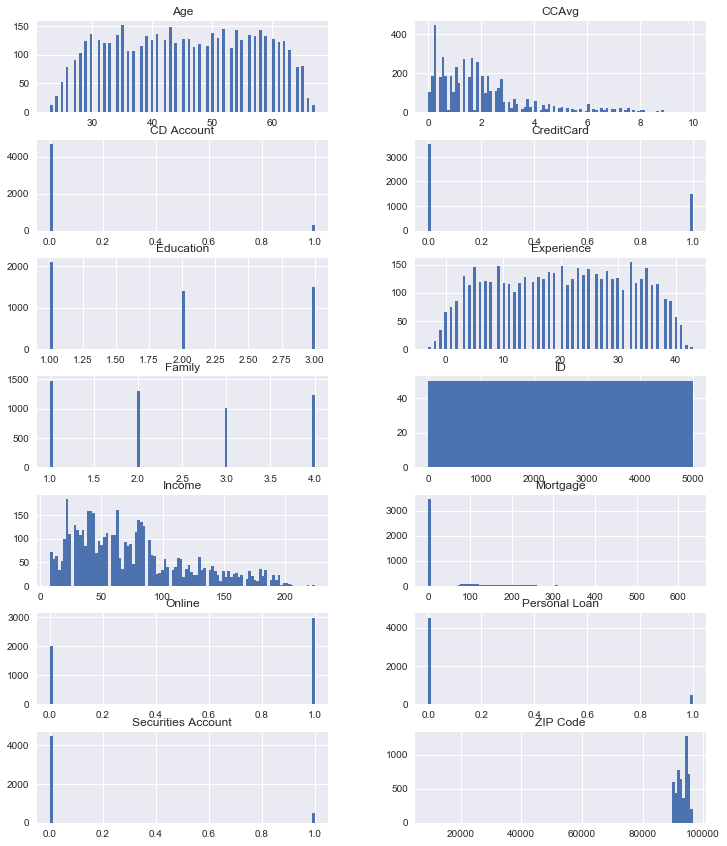

In [22]:
columns = list(bdata) # Excluding Outcome column which has only 
bdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

In [23]:
bdata.corr() # It will show correlation matrix 
# Observations 
# There is high positive correlation between Personal Loan 
# and factors such as Income (.50), Credit card avg(0.36) and CD account(0.31)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [26]:
# Correlation in graphical representation 
def plot_corr(bdata, size=11):
    corr = bdata.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

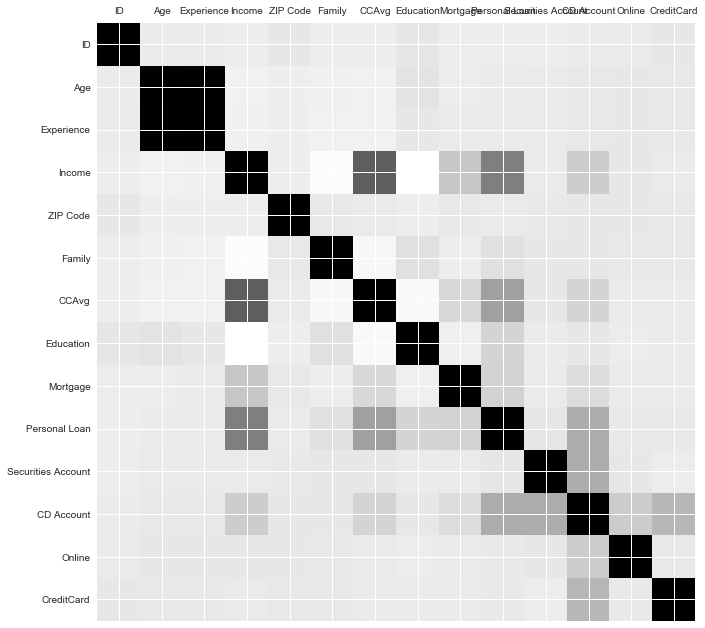

In [27]:
plot_corr(bdata)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


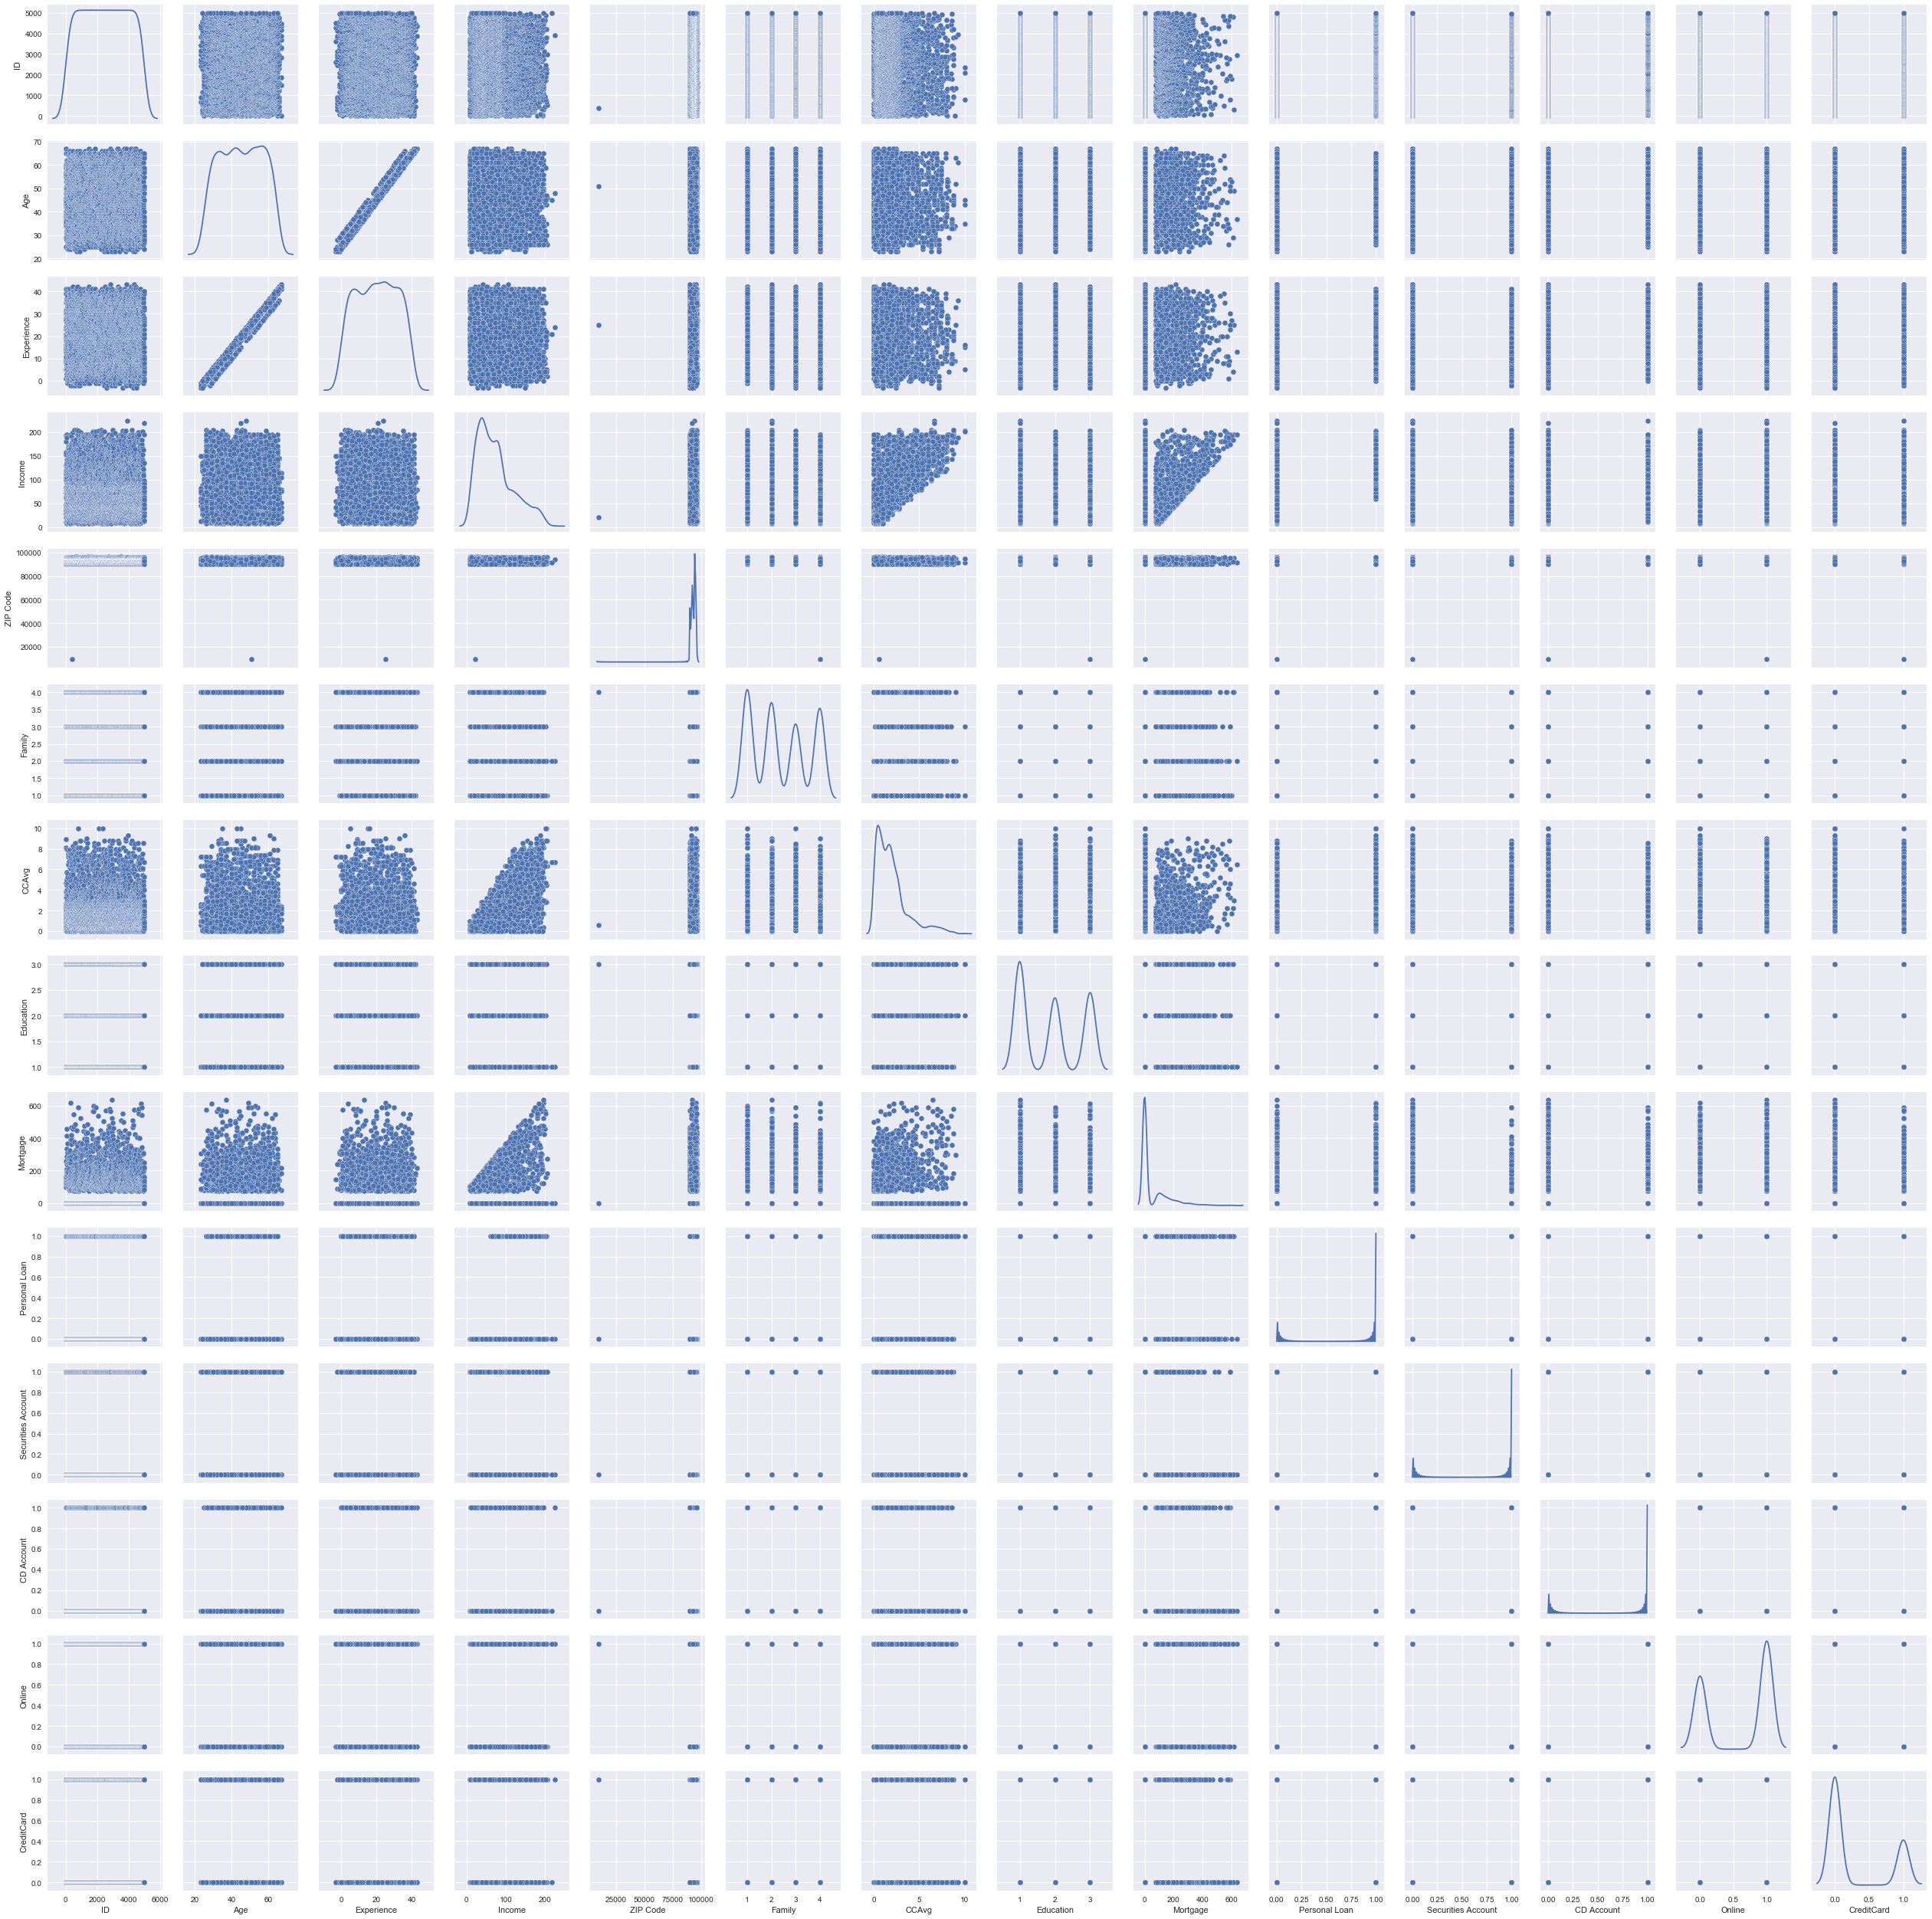

In [29]:
sns.pairplot(bdata,diag_kind='kde')

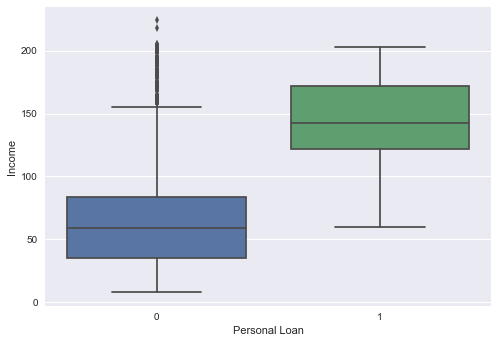

In [33]:
# Variation of Personal Loan acceptance versus Income is significant, and positively correlated
sns.boxplot(x=bdata['Personal Loan'],y=bdata['Income'])

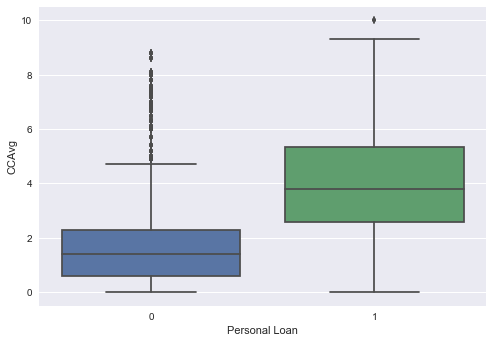

In [36]:
# Variation of Personal Loan acceptance with Credit Card Avg spending is significant, and positively correlated
sns.boxplot(x=bdata['Personal Loan'],y=bdata['CCAvg'])

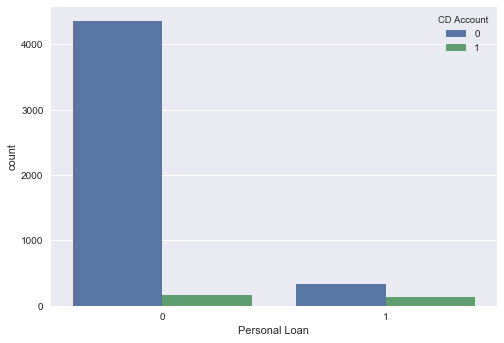

In [35]:
# Is Personal Loan acceptance significantly different by CD Account with bank?
sns.countplot(x='Personal Loan',hue='CD Account',data=bdata)
# If the customer has CD Account with bank, then the customer's likelihood of Personal Loan is higher (31.6% correlation) 

In [38]:
# Overall Personal loan true and false percentage
n_true = len(bdata.loc[bdata['Personal Loan'] == True])
n_false = len(bdata.loc[bdata['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))
# Number of true cases 9.60% overall

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


In [70]:
# The first column is id column and has nothing to do with the model attriibutes, so dropping it
bdata = bdata.drop(labels = "ID", axis = 1)

In [71]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

X = bdata.drop('Personal Loan',axis=1)     # Predictor feature columns 
Y = bdata['Personal Loan']                 # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,39,13,21,95518,3,0.2,2,0,0,0,1,0


In [72]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [73]:
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)


In [74]:
x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,39,13,21,95518,3,0.2,2,0,0,0,1,0


In [75]:
# Logistic Regression Model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Define model
model = LogisticRegression(solver="liblinear")
# Fit the model on train
model.fit(x_train, y_train)
# Predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0 -0.000528 -0.00201  0.036089 -0.000066  0.015165  0.009454  0.016447   

          7         8         9        10        11  intercept  
0  0.000833  0.000534  0.004681 -0.000177 -0.000067  -0.000106  


In [76]:
# Model score
model_score = model.score(x_test, y_test)
print(model_score)

0.907333333333


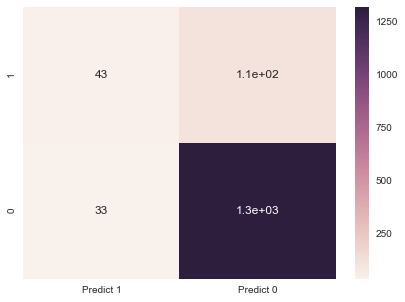

In [77]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [89]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.29      0.38       149
          0       0.93      0.98      0.95      1351

avg / total       0.89      0.91      0.89      1500



In [78]:
# Naive Bayes Model

# Using Gaussian algorithm from Naive Bayes
from sklearn.naive_bayes import GaussianNB 

# create the model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

In [79]:
# Calculate and print train model accuracy
nb_train_predict = nb_model.predict(x_train)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_train_predict)))

Model Accuracy: 0.8943


In [80]:
# Calculate and print test model accuracy
nb_test_predict = nb_model.predict(x_test)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_test_predict)))

Model Accuracy: 0.8840


Confusion Matrix


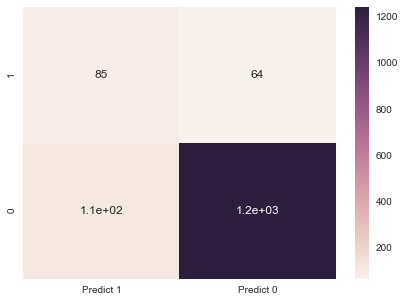

In [81]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, nb_test_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [82]:
print("Classification Report")
print(metrics.classification_report(y_test, nb_test_predict, labels=[1, 0]))

Classification Report
             precision    recall  f1-score   support

          1       0.44      0.57      0.49       149
          0       0.95      0.92      0.93      1351

avg / total       0.90      0.88      0.89      1500



In [83]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [84]:
bdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [85]:
bdata.groupby(['Personal Loan']).count()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480


In [86]:
# Create a separate dataframe consisting only of the features i.e independent attributes
Y = bdata['Personal Loan']
X = bdata.drop(labels = 'Personal Loan', axis = 1)
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [87]:
# Convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances

XScaled  = X.apply(zscore)  # convert all attributes to Z scale
XScaled.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [90]:
# Split test train in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

In [91]:
# Nearest neighbours classification initialise
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [92]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [93]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. 
# The majority class will be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, Y_test)

0.94866666666666666

In [103]:
# Calculate accuracy measures and confusion matrix
print("Confusion Matrix")
cm = metrics.confusion_matrix(Y_test, predicted_labels)    # 1 means personal loan yes

Confusion Matrix


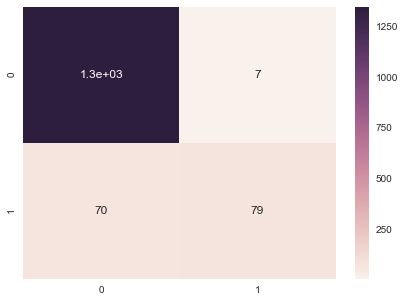

In [104]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [106]:
print("Classification Report")
print(metrics.classification_report(Y_test, predicted_labels, labels=[1, 0]))

Classification Report
             precision    recall  f1-score   support

          1       0.92      0.53      0.67       149
          0       0.95      0.99      0.97      1351

avg / total       0.95      0.95      0.94      1500



In [ ]:
# Basis of best model selection - Cost of bad personal loan is high, so Precision may be a better measure to compare. f1 score gives a good balanced overall performance.
# Hence in summary the KNN model is considered the best model for this exercise. It has high precision, accuracy, recall and f1 score.